# PRACTICA 5 - CONVOLUCIÓN

In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as plti

from matplotlib import cm #Para graficar los kernels
from scipy.signal import convolve2d #Función para hacer la convolución

%matplotlib inline

In [2]:
M_YIQ = np.array([[0.299, 0.587, 0.114],
                  [0.595716, -0.274453, -0.321263],
                  [0.211456, -0.522591, 0.311135]])

M_RGB = np.array([[1, 0.9563, 0.6210],
                  [1, -0.2721, -0.6474],
                  [1, -1.1070, 1.7046]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, M_YIQ)

def yiq2rgb(img):
    return apply_matrix(img, M_RGB)
 
def rmse(img1, img2):
    return np.sqrt(np.mean((img1-img2)**2))


import scipy.stats as st

def gaussian(N, sigma=1):
    x = np.linspace(-sigma, sigma, N+1) #linspace crea un vector de valores entre -sigma y sigma igualmente distribuidos
    gaussian_dist = np.diff(st.norm.cdf(x)) #CDF = Cumulative distribution function NORM: distribucion normal/gaussiana.
    gaussian_filter = np.outer(gaussian_dist, gaussian_dist)
    return gaussian_filter/gaussian_filter.sum()

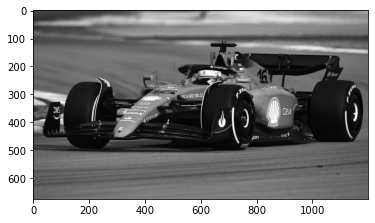

In [3]:
img = imageio.imread("ferrari.png")[:,:,0]/255
plt.imshow(img, 'gray')

In [4]:
from matplotlib import cm

#Para dibujar el Kernel en 3D.
def plot_kernel(data, ax=None):
    rows, cols = data.shape
    y, x = np.meshgrid(np.arange(rows),np.arange(cols),indexing='ij')
    if ax == None:
        fig = plt.figure()
        ax = fig.gca(projection='3d')
    _min, _max = (np.min(data), np.max(data))
    ax.plot_surface(x, y, data.T, cmap=cm.jet, vmin=_min, vmax=_max)

#Para graficar imagen, imagen filtrada y kernel en un solo grafico.
def plot_images_and_kernel(img, img_filt, kernel):
    fig = plt.figure(figsize=(17,5))
    ax1 = fig.add_subplot(131)
    ax1.imshow(img, 'gray')
    ax1.title.set_text('Input image')
    ax2 = fig.add_subplot(132)
    ax2.imshow(img_filt, 'gray')
    ax2.title.set_text('Filtered image')
    ax3 = fig.add_subplot(133, projection='3d')
    plot_kernel(kernel, ax=ax3)
    ax3.title.set_text('Kernel')
    plt.show()

[[0.00764585 0.00908199 0.01027016 0.01105644 0.01133168 0.01105644
  0.01027016 0.00908199 0.00764585]
 [0.00908199 0.01078788 0.01219923 0.01313319 0.01346014 0.01313319
  0.01219923 0.01078788 0.00908199]
 [0.01027016 0.01219923 0.01379522 0.01485137 0.01522109 0.01485137
  0.01379522 0.01219923 0.01027016]
 [0.01105644 0.01313319 0.01485137 0.01598838 0.0163864  0.01598838
  0.01485137 0.01313319 0.01105644]
 [0.01133168 0.01346014 0.01522109 0.0163864  0.01679434 0.0163864
  0.01522109 0.01346014 0.01133168]
 [0.01105644 0.01313319 0.01485137 0.01598838 0.0163864  0.01598838
  0.01485137 0.01313319 0.01105644]
 [0.01027016 0.01219923 0.01379522 0.01485137 0.01522109 0.01485137
  0.01379522 0.01219923 0.01027016]
 [0.00908199 0.01078788 0.01219923 0.01313319 0.01346014 0.01313319
  0.01219923 0.01078788 0.00908199]
 [0.00764585 0.00908199 0.01027016 0.01105644 0.01133168 0.01105644
  0.01027016 0.00908199 0.00764585]]


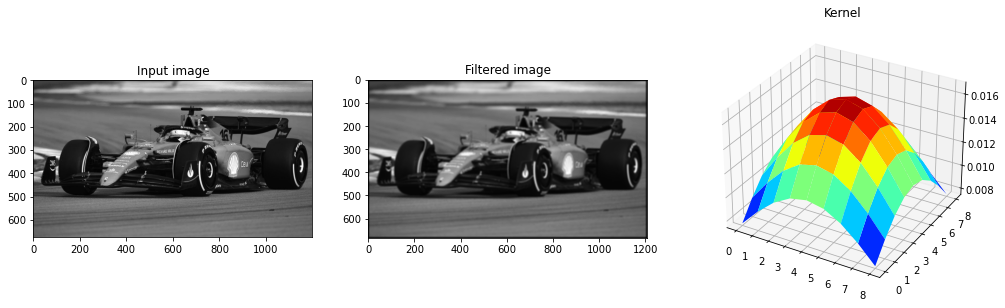

In [61]:
# Ejemplo del kernel identidad
kernel = gaussian(9)

#
#kernel = kernel / kernel.sum()

print(kernel)

img_filt = convolve2d(img, kernel, mode='full')
plot_images_and_kernel(img, img_filt, kernel)

## Practica

Convolucionar una imagen con distintos kernels y utilizar la función plot_images_and_kernel() para graficar el resultado.

### 1.1. Implementar los siguientes filtros simétricos (invariantes a la rotación de 90°)

Pasabajos: Definir un kernel de tamaño NxN, con N impar. (Los pasabajos se normalizan dividiendo por la suma del kernel)

1. Box (cuadrado)
2. Circle (circular)
3. Bartlett (piramidal)
4. Gaussian

Pasaaltos:

5. Laplace (4 y 8 vecinos)
6. Pasaaltos a partir de un pasabajos: PA = Id - PB

Pasabanda:

7. Difference of Gaussian (DoG)

Otros:

8. Mejora de contraste (combinación del filtro identidad más "un poco" de pasaaltos) 

### 1.2. Implementar los siguientes filtros  asimétricos (direccionales)

Sobel 3x3 -> Calcular valor absoluto de gradientes Gx y Gy.

### 1.3. Implementar un detector de bordes a partir del filtro de Sobel

Aplicar un umbral al módulo del filtro de Sobel para obtener una imagen binaria con 1s y 0s.


### -----------------------------------------------------------------------------------------------------------

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


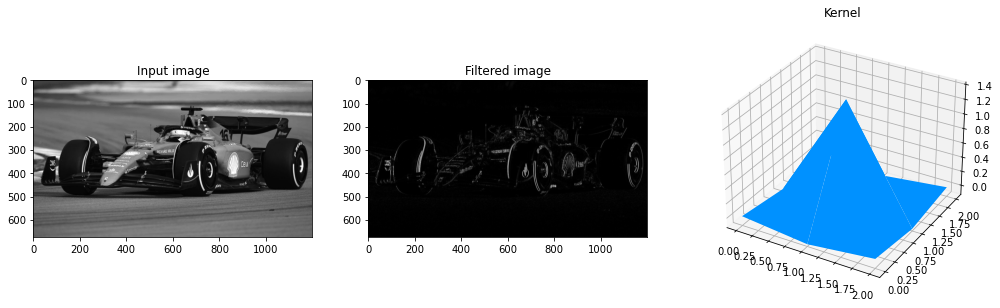

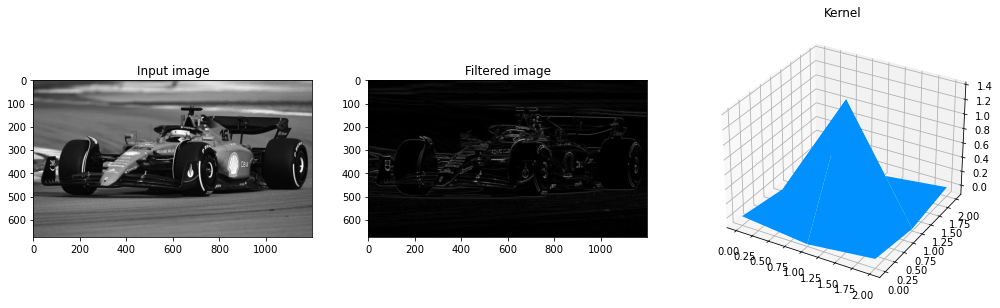

In [56]:
#N = 5
#kernel = np.ones((N,N))/(N*N)

kernelX = np.array([[-1,0,1],
                   [-2,0,2],
                   [-1,0,1]])

kernelY = np.array([[1,2,1],
                   [0,0,0],
                   [-1,-2,-1]])


#kernel = kernel/kernel.sum()
#kernel = kernel*0.1 + kid
print(kernelX)

img_filt_X = convolve2d(img, kernelX, mode='same',boundary='symm')
img_filt_Y = convolve2d(img, kernelY, mode='same',boundary='symm')

absoluto = np.sqrt(img_filt_X*img_filt_X + img_filt_Y*img_filt_Y)

plot_images_and_kernel(img, abs(img_filt_X), kernel)
plot_images_and_kernel(img, abs(img_filt_Y), kernel)

plti.imsave("espectro.png", abs(img_filt_X), cmap='gray')
plti.imsave("espectro2.png", abs(img_filt_Y), cmap='gray')
plti.imsave("espectro3.png", absoluto, cmap='gray')